In [10]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import scipy

In [11]:
alzheimers = np.load("data/AD_EEG_sub_001_processed.npy")
control = np.load("data/Control_EEG_sub_037_processed.npy")

In [ ]:
fs = 500 # Sampling rate (Hz)
nperseg = fs * 2 # test spacing frequency between bins

In [37]:
fp1_control, fp1_psd_control = scipy.signal.welch(control[0, :], fs=fs, nperseg=nperseg)
fp1_ad, fp1_psd_ad = scipy.signal.welch(alzheimers[0, :], fs=fs, nperseg=nperseg)

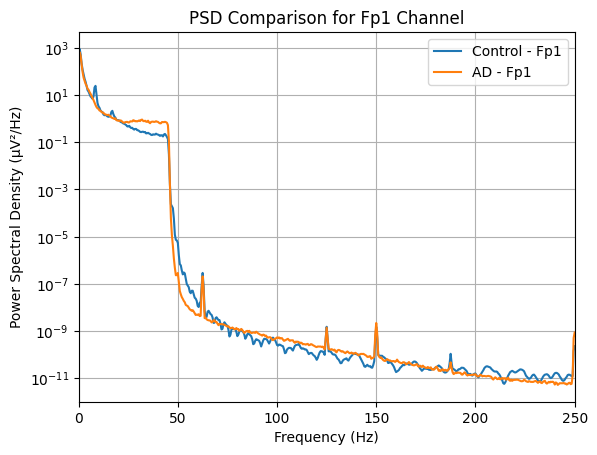

In [38]:
plt.semilogy(fp1_control, fp1_psd_control, label='Control - Fp1')
plt.semilogy(fp1_ad, fp1_psd_ad, label='AD - Fp1')
plt.xlim(0, fs/2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (µV²/Hz)')
plt.title('PSD Comparison for Fp1 Channel')
plt.legend()
plt.grid(True)
plt.show()

In [39]:
fp2_control, fp2_psd_control = scipy.signal.welch(control[1, :], fs=fs, nperseg=nperseg)
fp2_ad, fp2_psd_ad = scipy.signal.welch(alzheimers[1, :], fs=fs, nperseg=nperseg)

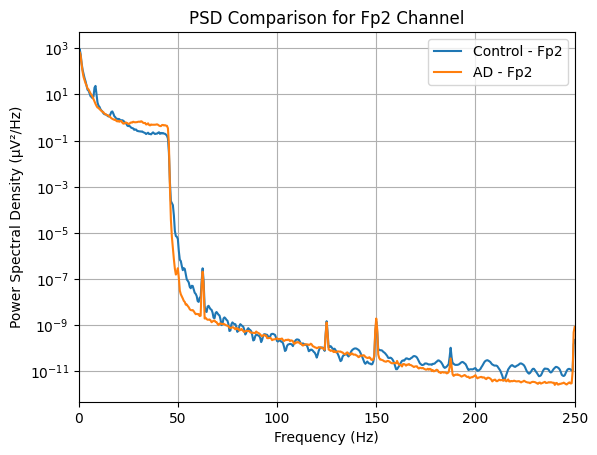

In [40]:
plt.semilogy(fp2_control, fp2_psd_control, label='Control - Fp2')
plt.semilogy(fp2_ad, fp2_psd_ad, label='AD - Fp2')
plt.xlim(0, fs/2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (µV²/Hz)')
plt.title('PSD Comparison for Fp2 Channel')
plt.legend()
plt.grid(True)
plt.show()

In [41]:
fp3_control, fp3_psd_control = scipy.signal.welch(control[2, :], fs=fs, nperseg=nperseg)
fp3_ad, fp3_psd_ad = scipy.signal.welch(alzheimers[2, :], fs=fs, nperseg=nperseg)

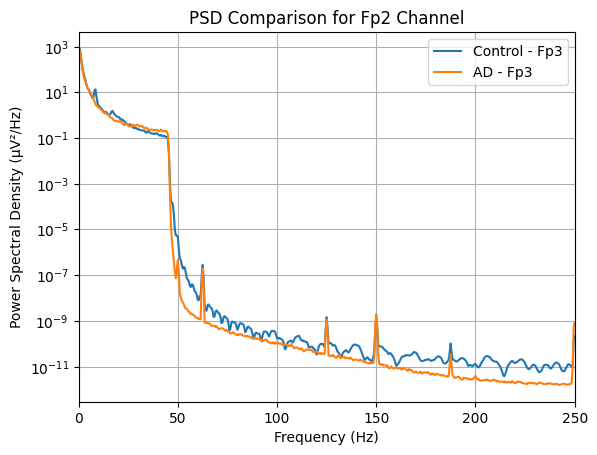

In [45]:
plt.semilogy(fp3_control, fp3_psd_control, label='Control - Fp3')
plt.semilogy(fp3_ad, fp3_psd_ad, label='AD - Fp3')
plt.xlim(0, fs/2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (µV²/Hz)')
plt.title('PSD Comparison for Fp2 Channel')
plt.legend()
plt.grid(True)
plt.show()

It does not seem like there is much difference visually, let's see if there is a statistical difference.